## Q2.베이직 구독 사용자가 프리미엄 구독으로 전환할 가능성은 얼마나 되는가?
> "베이직 사용자는 특정 조건(예: 높은 `문의횟수` 또는 긴 `구독기간`)을 만족할 때 프리미엄으로 전환할 가능성이 높다."

#### 2-1 데이터 전처리

In [65]:
# import pandas as pd

# df = pd.read_csv('C:\\workspace\\WASSUP4\\data\\mini.csv', sep=',')

# basic_users = df[df['subscription_type'] == 'Basic']

# basic_users.head()

# print(df.columns)

# basic_users[['customer_inquiry_history', 'subscription_duration', 'target']].describe()

# import seaborn as sns
# import matplotlib.pyplot as plt

# # 상관관계 히트맵 - 'upgraded' 대신 'target'을 사용
# plt.figure(figsize=(8, 6))
# sns.heatmap(basic_users[['customer_inquiry_history', 'subscription_duration', 'target']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title("Correlation Heatmap for Basic Users")
# plt.show()


In [176]:
# 결측치 없음.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

font_path = "C:/Windows/Fonts/malgun.ttf"  # Malgun Gothic font path

font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # Ensure minus signs display properly
plt.rcParams['font.size'] = 12  # Set font size
# 축 스타일 설정
plt.rcParams['axes.facecolor'] = '#fff'    # 축 배경색을 밝은 회색으로
plt.rcParams['axes.edgecolor'] = '#333333'    # 축 테두리 색상은 어두운 회색
plt.rcParams['axes.grid'] = False              # 그리드 활성화
plt.rcParams['grid.color'] = '#CCCCCC'        # 그리드 색상 밝은 회색
plt.rcParams['grid.linestyle'] = '--'         # 그리드 선 스타일을 점선으로

# 선 스타일 설정
plt.rcParams['lines.linewidth'] = 2           # 선의 두께를 2로 설정
plt.rcParams['lines.color'] = 'b'             # 기본 선 색상을 파란색으로



file_path = 'C:\\workspace\\WASSUP4\\data\\mini.csv'
df = pd.read_csv(file_path, sep=',')

# Basic 사용자의 데이터만 필터링
basic_users = df[df['subscription_type'] == 'Basic']

### 2-2 상관관계 분석

#### 2-2-1 히트맵
> 모든 변수들이 상관계수가 거의 0에 가까워 상관관계가 매우 낮음을 나타냅니다.
예를 들어, customer_inquiry_history와 target 간의 상관계수는 약 -0.0028로, 매우 미약한 음의 상관관계만을 보입니다.
<br>이 결과는 문의 횟수나 구독 기간이 단독으로 프리미엄 전환에 강한 영향을 미치지 않음을 시사합니다. 추가적인 변수나 조합이 더 필요할 수 있습니다.

#### 

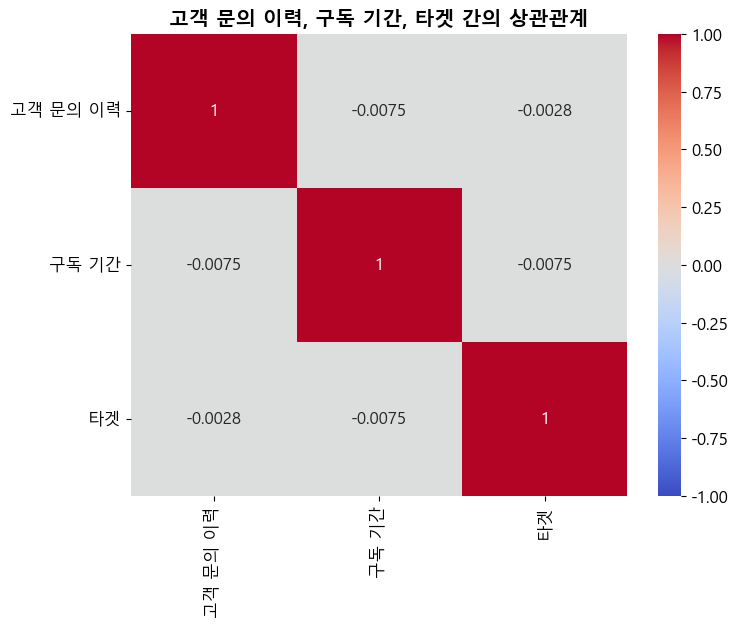

In [177]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(
#     basic_users[['customer_inquiry_history', 'subscription_duration', 'target']].corr(), 
#     annot=True, cmap='coolwarm', vmin=-1, vmax=1
# )

# plt.xticks(rotation=90)
# plt.show()
basic_users_kor = basic_users.rename(columns={
    'customer_inquiry_history': '고객 문의 이력',
    'subscription_duration': '구독 기간',
    'target': '타겟'
})

plt.figure(figsize=(8, 6))
sns.heatmap(
    basic_users_kor[['고객 문의 이력', '구독 기간', '타겟']].corr(), 
    annot=True, cmap='coolwarm', vmin=-1, vmax=1
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title("고객 문의 이력, 구독 기간, 타겟 간의 상관관계", fontweight='bold')
plt.show()

### 2-3 프리미엄 전환 여부

#### 2-3-1 

C:\Users\munseoyeon\AppData\Local\Temp\ipykernel_7236\916309613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='customer_inquiry_history', data=basic_users, palette=p)
C:\Users\munseoyeon\AppData\Local\Temp\ipykernel_7236\916309613.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x='target', y='customer_inquiry_history', data=basic_users, palette=p)


Text(0, 0.5, 'Customer Inquiry History')

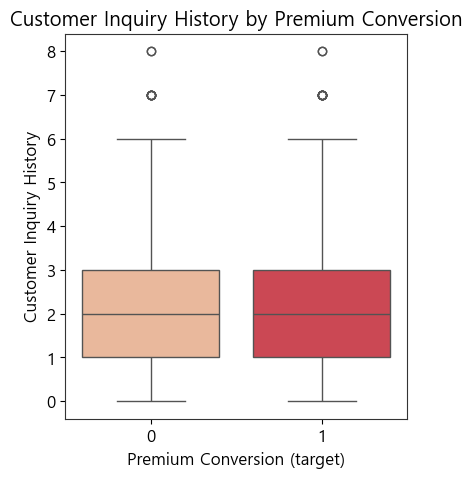

In [178]:
# 전체 박스플롯을 그리기 위한 설정 (하나의 figure로 설정)
plt.figure(figsize=(15, 5))
# p = sns.color_palette("YlOrBr", as_cmap=False)[::3]
p = sns.color_palette("rocket")[::-2]
# 1. customer_inquiry_history와 target의 박스플롯
plt.subplot(1, 3, 1)
sns.boxplot(x='target', y='customer_inquiry_history', data=basic_users, palette=p)
plt.title('Customer Inquiry History by Premium Conversion')
plt.xlabel('Premium Conversion (target)')
plt.ylabel('Customer Inquiry History')

#### 2-3-2 


C:\Users\munseoyeon\AppData\Local\Temp\ipykernel_7236\1363227461.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='subscription_duration', data=basic_users, palette=p)
C:\Users\munseoyeon\AppData\Local\Temp\ipykernel_7236\1363227461.py:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x='target', y='subscription_duration', data=basic_users, palette=p)


Text(0, 0.5, 'Subscription Duration (months)')

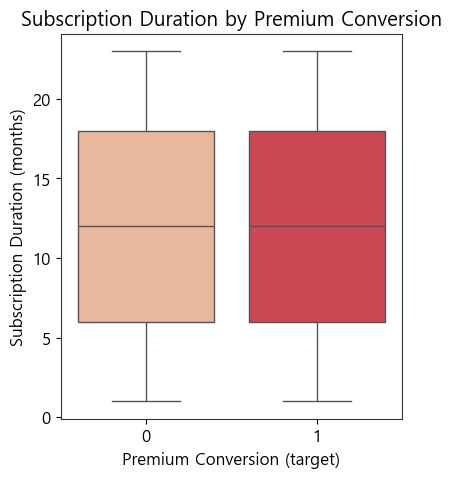

In [179]:
# 2. subscription_duration와 target의 박스플롯
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)

sns.boxplot(x='target', y='subscription_duration', data=basic_users, palette=p)
plt.title('Subscription Duration by Premium Conversion')
plt.xlabel('Premium Conversion (target)')
plt.ylabel('Subscription Duration (months)')

#### 2-3-3 

C:\Users\munseoyeon\AppData\Local\Temp\ipykernel_7236\1289533251.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='average_time_per_learning_session', data=basic_users, palette=p)
C:\Users\munseoyeon\AppData\Local\Temp\ipykernel_7236\1289533251.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x='target', y='average_time_per_learning_session', data=basic_users, palette=p)


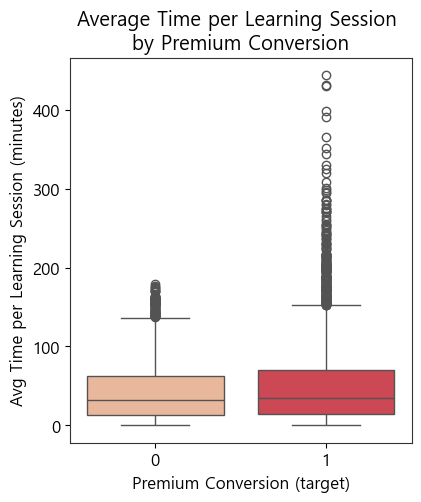

In [180]:
plt.figure(figsize=(15, 5))
# 3. average_time_per_learning_session와 target의 박스플롯
# 필터링된 basic_users 데이터에 average_time_per_learning_session이 있다고 가정합니다.


if 'average_time_per_learning_session' in basic_users.columns:
    plt.subplot(1, 3, 3)
    sns.boxplot(x='target', y='average_time_per_learning_session', data=basic_users, palette=p)
    plt.title('Average Time per Learning Session \nby Premium Conversion')
    plt.xlabel('Premium Conversion (target)')
    plt.ylabel('Avg Time per Learning Session (minutes)')

#### 2-3-4 문의 횟수와 구독 기간 관계
> 산점도는 두 변수 간의 관계와 함께 target 변수에 따라 색상을 다르게 표시하여 프리미엄 전환 여부에 따른 경향을 시각화
>
> customer_inquiry_history와 subscription_duration 간에 특별한 상관 패턴이 보이지 않습니다. 문의 횟수가 많고 구독 기간이 길어질수록 전환 여부가 증가한다는 명확한 경향이 없습니다.
>
> 대부분의 데이터가 customer_inquiry_history가 04, 그리고 subscription_duration이 020개월 범위에 집중되어 있습니다.
>
> 이 결과는 단독 변수가 아닌 다른 변수와의 조합이 필요할 수 있음을 시사합니다. 즉, 프리미엄 전환은 다수의 복합적인 행동 패턴에 의해 영향을 받을 가능성이 있습니다.


<Figure size 800x600 with 0 Axes>

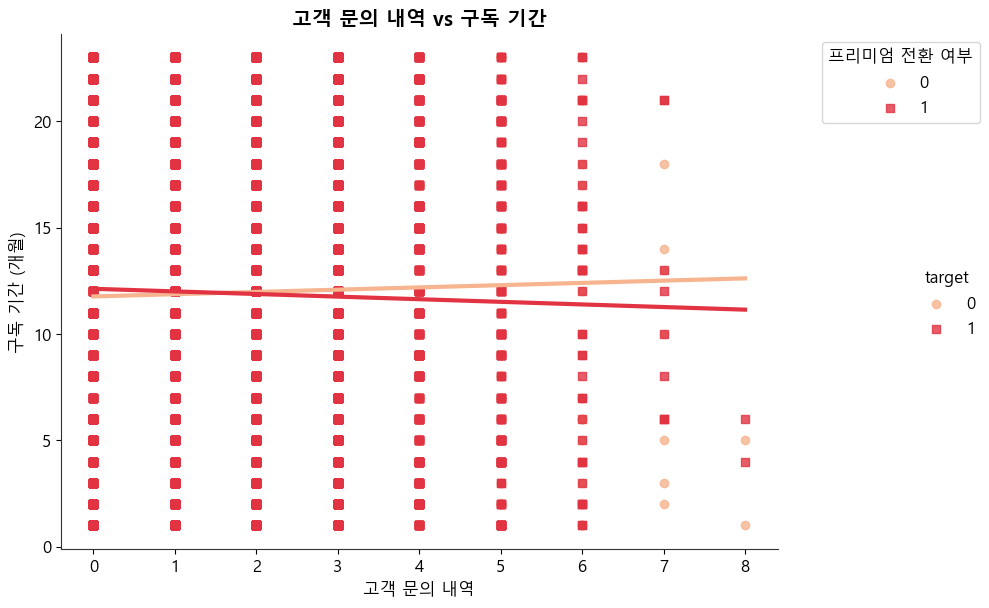

In [186]:
plt.figure(figsize=(8, 6))
# sns.scatterplot(x='customer_inquiry_history', y='subscription_duration', hue='target', data=basic_users, palette=p)
# plt.title("Customer Inquiry History vs Subscription Duration", fontweight='bold')
# plt.xlabel("Customer Inquiry History")
# plt.ylabel("Subscription Duration (Months)")
# plt.legend(title="Premium Upgrade")
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='customer_inquiry_history', y='subscription_duration', hue='target', data=basic_users, palette=p)
# plt.title("Customer Inquiry History vs Subscription Duration", fontweight='bold')
# plt.xlabel("Customer Inquiry History")
# plt.ylabel("Subscription Duration (Months)")
# plt.legend(title="Premium Upgrade")
# plt.show()


# lmplot을 사용하여 추세선 추가
sns.lmplot(
    x='customer_inquiry_history', 
    y='subscription_duration', 
    hue='target', 
    data=basic_users, 
    palette=p, 
    height=6, 
    aspect=4/3,
    markers=['o', 's'],     # 각 대상에 맞는 마커 설정
    ci=None                 # 신뢰 구간을 표시하지 않음
)

plt.title("고객 문의 내역 vs 구독 기간", fontweight='bold')  # 타이틀 한글 및 볼드체
plt.xlabel("고객 문의 내역")
plt.ylabel("구독 기간 (개월)")

# 범례 제목 한글로 변경 및 위치 조정
plt.legend(title="프리미엄 전환 여부", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## 2-4 결과 분석
> 프리미엄 전환 가능성을 예측하기 위해서는 단독 변수보다 복합적인 데이터 분석이 필요하다는 결론

C:\Users\munseoyeon\AppData\Local\Temp\ipykernel_7236\3978153861.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='프리미엄 전환 여부', y='고객 문의 내역', data=basic_users_kor, palette=p)
C:\Users\munseoyeon\AppData\Local\Temp\ipykernel_7236\3978153861.py:16: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x='프리미엄 전환 여부', y='고객 문의 내역', data=basic_users_kor, palette=p)
C:\Users\munseoyeon\AppData\Local\Temp\ipykernel_7236\3978153861.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='프리미엄 전환 여부', y='구독 기간', data=basic_users_kor, palette=p)
C:\Users\munseoyeon\AppData\Local\Temp\ipykernel_7236\3978153861.py:23: UserWarning: The palette

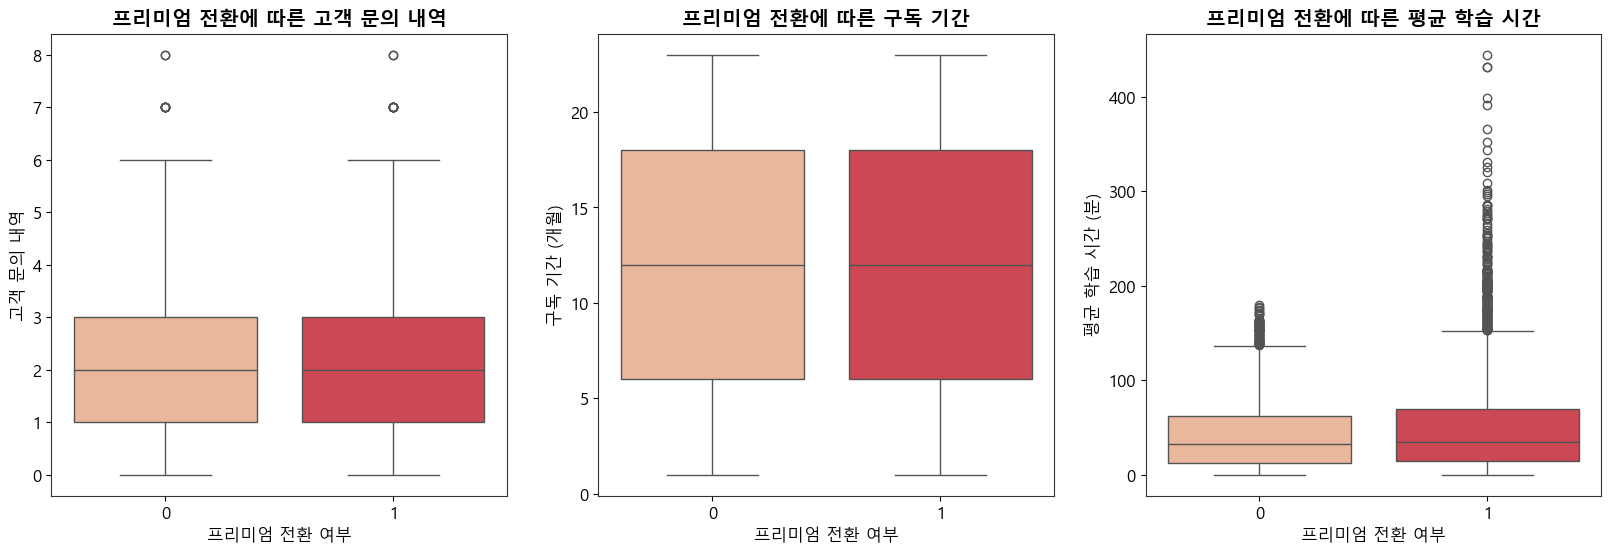

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 컬럼명 한글로 변경
basic_users_kor = basic_users.rename(columns={
    'customer_inquiry_history': '고객 문의 내역',
    'subscription_duration': '구독 기간',
    'target': '프리미엄 전환 여부',
    'average_time_per_learning_session': '평균 학습 시간'
})

plt.figure(figsize=(20, 6))

# 첫 번째 그래프: 고객 문의 내역
plt.subplot(1, 3, 1)
sns.boxplot(x='프리미엄 전환 여부', y='고객 문의 내역', data=basic_users_kor, palette=p)
plt.title('프리미엄 전환에 따른 고객 문의 내역', fontweight='bold')
plt.xlabel('프리미엄 전환 여부')
plt.ylabel('고객 문의 내역')

# 두 번째 그래프: 구독 기간
plt.subplot(1, 3, 2)
sns.boxplot(x='프리미엄 전환 여부', y='구독 기간', data=basic_users_kor, palette=p)
plt.title('프리미엄 전환에 따른 구독 기간', fontweight='bold')
plt.xlabel('프리미엄 전환 여부')
plt.ylabel('구독 기간 (개월)')

# 세 번째 그래프: 평균 학습 시간 (컬럼이 있는 경우)
if '평균 학습 시간' in basic_users_kor.columns:
    plt.subplot(1, 3, 3)
    sns.boxplot(x='프리미엄 전환 여부', y='평균 학습 시간', data=basic_users_kor, palette=p)
    plt.title('프리미엄 전환에 따른 평균 학습 시간', fontweight='bold')
    plt.xlabel('프리미엄 전환 여부')
    plt.ylabel('평균 학습 시간 (분)')

#plt.tight_layout()  # 그래프 간의 간격 조정
plt.show()
